# Models


### Import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../data')
from process_data import process_data
from vgg16 import vgg16_labels
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import random
random.seed(77)


In [23]:
#pull in thumbnail image classifications
vgg16_label_df = pd.read_csv('../data/vgg16.csv',index_col=0)

In [24]:
#pull in train and test datasets
X_train, y_train,X_test,y_test = process_data(buckets = 10)

#thumbail embeddings and video attributes
#X_train = X_train.merge(vgg16_label_df, on='video_id')
#X_test = X_test.merge(vgg16_label_df, on='video_id')

dummies = pd.get_dummies(vgg16_label_df['label_1'], prefix='', prefix_sep='')
vgg16_label_df = pd.concat([vgg16_label_df,dummies],axis=1).drop(columns = ['label_1','label_2','label_3'])




In [25]:

#only thumbnail embeddings
X_train = vgg16_label_df[vgg16_label_df['video_id'].isin(X_train.video_id)]
X_test = vgg16_label_df[vgg16_label_df['video_id'].isin(X_test.video_id)]

print(X_train.shape)
print(X_test.shape)

(1859, 423)
(465, 423)


### Model: Logistic Regression

In [16]:
X_train = X_train.drop(columns=X_train.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)
X_test = X_test.drop(columns=X_test.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)

In [17]:
y_train['views_category_10']

2316    60
406     30
645     70
1206    90
592     70
        ..
1095    10
1462    30
2197    30
1039     0
1147    30
Name: views_category_10, Length: 1859, dtype: category
Categories (10, int64): [0 < 10 < 20 < 30 ... 60 < 70 < 80 < 90]

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.12      0.13        51
          10       0.03      0.02      0.02        44
          20       0.18      0.05      0.08        58
          30       0.04      0.09      0.05        32
          40       0.05      0.02      0.03        54
          50       0.07      0.31      0.12        35
          60       0.00      0.00      0.00        40
          70       0.07      0.02      0.03        57
          80       0.02      0.02      0.02        44
          90       0.14      0.14      0.14        50

    accuracy                           0.07       465
   macro avg       0.08      0.08      0.06       465
weighted avg       0.08      0.07      0.06       465

Confusion Matrix:



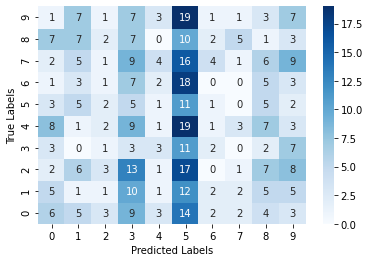

In [18]:
# Instantiate the model with default hyperparameters
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
logreg.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = logreg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Model: Gradient Boosted Decision Trees


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.18      0.17        51
          10       0.04      0.02      0.03        44
          20       0.18      0.10      0.13        58
          30       0.04      0.06      0.04        32
          40       0.06      0.02      0.03        54
          50       0.06      0.26      0.10        35
          60       0.07      0.07      0.07        40
          70       0.09      0.04      0.05        57
          80       0.00      0.00      0.00        44
          90       0.13      0.12      0.12        50

    accuracy                           0.08       465
   macro avg       0.08      0.09      0.07       465
weighted avg       0.09      0.08      0.08       465

Confusion Matrix:



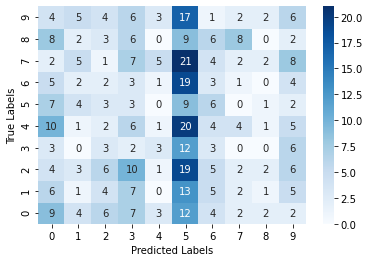

In [19]:
# Instantiate the model with default hyperparameters
gbc = GradientBoostingClassifier()

# Train the model on the training data
gbc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Model: Random Forest
This model was optimized using TPOT, an AutoML library.

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.18      0.16        51
          10       0.05      0.07      0.06        44
          20       0.11      0.05      0.07        58
          30       0.03      0.06      0.04        32
          40       0.07      0.09      0.08        54
          50       0.07      0.11      0.09        35
          60       0.11      0.07      0.09        40
          70       0.08      0.04      0.05        57
          80       0.00      0.00      0.00        44
          90       0.12      0.14      0.13        50

    accuracy                           0.08       465
   macro avg       0.08      0.08      0.08       465
weighted avg       0.08      0.08      0.08       465

Confusion Matrix:



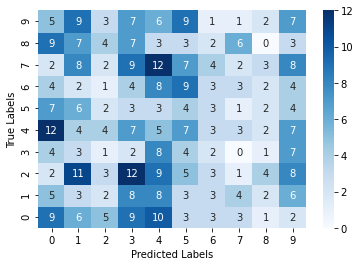

In [20]:

# Instantiate the model with default hyperparameters
rfc = RandomForestClassifier()

# Train the model on the training data
rfc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

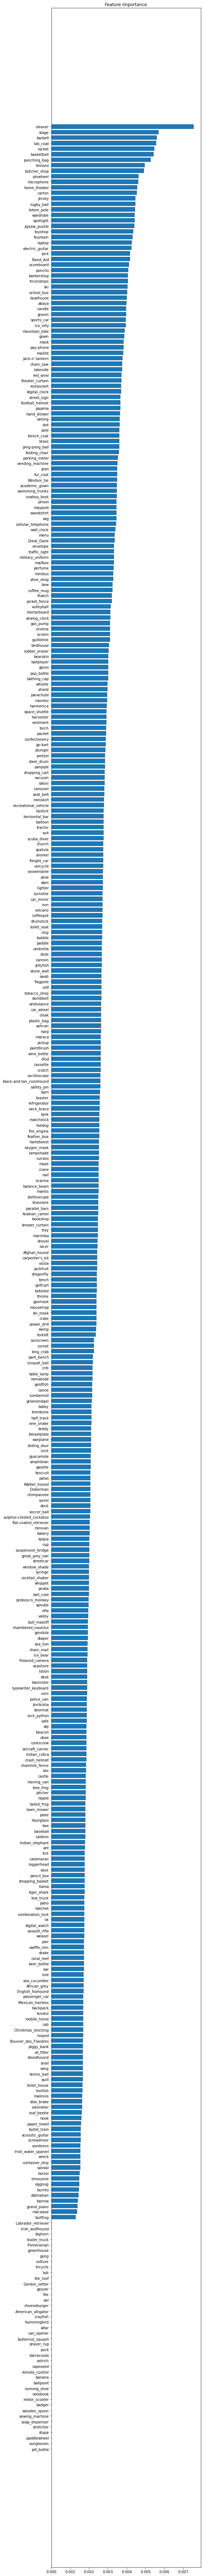

In [21]:
# Get Feature importance data using feature_importances_ attribute
feature_importance = rfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 100))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X_train.columns))[sorted_idx])
plt.title('Feature Importance')
fig.tight_layout()
plt.show()